In [13]:
# import spacec first
import spacec as sp

# silencing warnings
import warnings
warnings.filterwarnings('ignore')

#import standard packages
import os
import scanpy as sc
import copy
sc.settings.set_figure_params(dpi=80, facecolor='white')

root_path = "/Users/arcz/Desktop/research/allo immunity/OLT-alloimmunity/" 
data_path = '/Users/arcz/Desktop/research/allo immunity/example_data/raw/'
output_dir = "/Users/arcz/Desktop/research/allo immunity/OLT-alloimmunity/space/saves/"
os.makedirs(output_dir, exist_ok=True)

## TODO

1. discover what is required for 06 cell neighborhood analysis
2. find the structures expected and paste the expected formats 
3. reinstall with proper version and rerun hopefully with same results

#### 06 
requires andata obj for everything else

In [47]:
adata = sc.read(output_dir + 'adata_nn_demo_annotated.h5ad')
bdata = copy.deepcopy(adata)
print(adata)
print(bdata.obs.columns) 
print(len(adata.obs.columns),len(bdata.obs.columns)) 


AnnData object with n_obs × n_vars = 48342 × 58
    obs: 'DAPI', 'x', 'y', 'area', 'region_num', 'unique_region', 'condition', 'leiden_1', 'leiden_1_subcluster', 'cell_type_coarse', 'cell_type_coarse_subcluster', 'cell_type_coarse_f', 'cell_type_coarse_f_subcluster', 'cell_type'
    uns: 'cell_type_coarse_f_subcluster', 'cell_type_coarse_subcluster', 'cell_type_colors', 'dendrogram_leiden_1', 'leiden_1', 'leiden_1_colors', 'leiden_1_subcluster', 'neighbors', 'pca', 'umap', 'unique_region_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'
Index(['DAPI', 'x', 'y', 'area', 'region_num', 'unique_region', 'condition',
       'leiden_1', 'leiden_1_subcluster', 'cell_type_coarse',
       'cell_type_coarse_subcluster', 'cell_type_coarse_f',
       'cell_type_coarse_f_subcluster', 'cell_type'],
      dtype='object')
14 14


Deleting column: DAPI
Starting: 1/2 : reg001
Finishing: 1/2 : reg001 0.05988883972167969 0.05992698669433594
Starting: 2/2 : reg002
Finishing: 2/2 : reg002 0.03782987594604492 0.09824800491333008


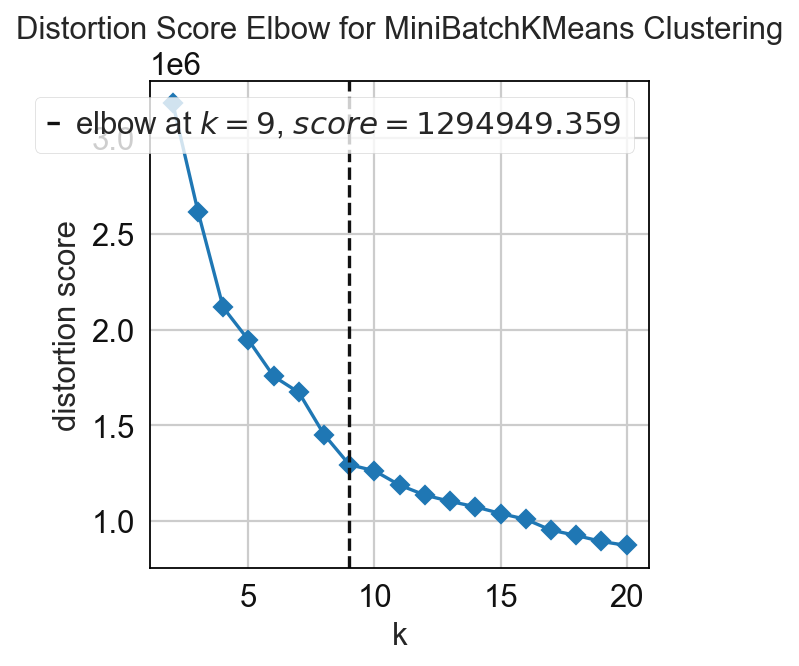

Successfully ran analysis without column: DAPI
Deleting column: x
Error when removing column: x
Deleting column: y
Error when removing column: y
Deleting column: area
Error when removing column: area
Deleting column: region_num
Error when removing column: region_num
Deleting column: unique_region
Error when removing column: unique_region
Deleting column: condition
Error when removing column: condition
Deleting column: leiden_1
Error when removing column: leiden_1
Deleting column: leiden_1_subcluster
Error when removing column: leiden_1_subcluster
Deleting column: cell_type_coarse
Error when removing column: cell_type_coarse
Deleting column: cell_type_coarse_subcluster
Error when removing column: cell_type_coarse_subcluster
Deleting column: cell_type_coarse_f
Error when removing column: cell_type_coarse_f
Deleting column: cell_type_coarse_f_subcluster
Error when removing column: cell_type_coarse_f_subcluster
Category is cell_type, skipping
Completed with errors:
- x: "['x'] not in index

In [48]:
errors = []



for category in bdata.obs:
    if category == "cell_type":
        print("Category is cell_type, skipping")
        continue

    print(f"Deleting column: {category}")

    del bdata.obs[category]

    try: 
        adata_result = sp.tl.neighborhood_analysis(
            bdata, 
            unique_region="unique_region", 
            cluster_col="cell_type",  
            X='x', Y='y',
            k=20, 
            n_neighborhoods=20,
            elbow=True
        )
        print(f"Successfully ran analysis without column: {category}")

    except Exception as e:
        print(f"Error when removing column: {category}")
        errors.append((category, str(e)))
        continue

    bdata = adata

print("Completed with errors:")
for col, err in errors:
    print(f"- {col}: {err}")


#### Creation of initial ann data obj
in 03.1_preprocessing
This is the insertion point, everything else can be made off this.

AnnData object with n_obs × n_vars = 64195 × 58
    obs: 'DAPI', 'x', 'y', 'area', 'region_num', 'unique_region', 'condition'



### 04_clustering
#### First 
function sp.tl.clustering() modifies ann data into

#TODO, using an already saved an data? double check that this is new

#### Second 
even though cell_type_coarse already exists, they remake it here in the initial clustering step

AnnData object with n_obs × n_vars = 57989 × 58
    obs: 'DAPI', 'x', 'y', 'area', 'region_num', 'unique_region', 'condition', 'leiden_1', 'leiden_1_subcluster', 'cell_type_coarse', 'cell_type_coarse_subcluster', 'cell_type_coarse_f', 'cell_type_coarse_f_subcluster', 'cell_type'
    uns: 'neighbors', 'umap', 'leiden_1', 'leiden_1_colors', 'unique_region_colors', 'pca', 'dendrogram_leiden_1', 'leiden_1_subcluster', 'cell_type_coarse_subcluster', 'cell_type_coarse_f_subcluster', 'cell_type_colors'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'scaled'
    obsp: 'distances', 'connectivities'

#### Third 
modify cell_type_coarse_f, in the second subcluster step, also subsequent removal of noise

AnnData object with n_obs × n_vars = 57989 × 58
    obs: 'DAPI', 'x', 'y', 'area', 'region_num', 'unique_region', 'condition', 'leiden_1', 'leiden_1_subcluster', 'cell_type_coarse', 'cell_type_coarse_subcluster', 'cell_type_coarse_f', 'cell_type_coarse_f_subcluster', 'cell_type'
    uns: 'neighbors', 'umap', 'leiden_1', 'leiden_1_colors', 'unique_region_colors', 'pca', 'dendrogram_leiden_1', 'leiden_1_subcluster', 'cell_type_coarse_subcluster', 'cell_type_coarse_f_subcluster', 'cell_type_colors'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'scaled'
    obsp: 'distances', 'connectivities'

### Fourth
In the third round of subclustering layers 'scaled' is modified

### Fifth
In the third round of subclustering 'cell_type' is modified and denoised, then later all changes are saved



